In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Bidirectional,InputLayer
from keras.layers import Flatten,BatchNormalization
from keras.layers import Dropout,Conv1D,MaxPooling1D,LSTM
from sklearn.preprocessing import OneHotEncoder,label_binarize
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [95]:
data=pd.read_csv("emotions.csv")

In [96]:
data.shape

(2132, 2549)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [98]:
data.isna().sum().sum()

0

In [99]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [100]:
data_new= pd.get_dummies(data, columns = ['label'])


In [101]:
data_new

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label_NEGATIVE,label_NEUTRAL,label_POSITIVE
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,1,0,0
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,0,1,0
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,0,0,1
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,0,0,1
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,0,1,0
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,0,0,1
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,1,0,0
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,1,0,0


In [102]:
X=data_new.loc[:,'# mean_0_a':'fft_749_b']
X.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [103]:
y=data_new.loc[:,'label_NEGATIVE':'label_POSITIVE']
y.head()

,label_NEGATIVE,label_NEUTRAL,label_POSITIVE
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [104]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

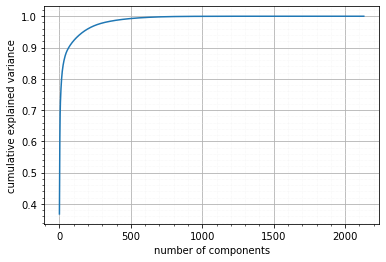

In [105]:
pca = PCA().fit(X_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.show()

In [106]:
pca = PCA(n_components = 145)
X_trans = pca.fit_transform(X_new)

In [107]:
X_fin = pd.DataFrame(data=X_trans)
X_fin.head(10)

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,35.657801,22.587212,-22.876329,-0.402041,0.135878,0.300305,0.371889,-5.019778,-3.524267,1.259205,...,-0.824626,0.430715,0.199682,0.292397,0.162577,-0.339839,-0.353481,-0.176243,0.643090,-2.886398
1,-21.885579,-2.029729,0.034290,-1.610424,-0.794432,0.119247,-0.723485,5.503747,-1.909677,-0.405101,...,-0.555311,1.454232,-0.184982,-1.119474,-0.328262,0.647172,-1.158733,-0.190128,-1.511840,-0.819586
2,35.274053,-14.873318,5.623630,-1.608727,0.594164,-7.690380,-0.609083,1.876396,2.300632,19.663583,...,1.554451,2.994682,1.255728,-0.417402,-3.173500,0.069510,2.752566,0.038723,0.194894,2.095589
3,2.087139,-20.876049,24.824895,-1.996328,-0.399807,-0.460872,2.148957,-4.536861,-2.997985,2.219055,...,-0.875319,-0.004764,-0.134075,-0.717846,-0.183011,0.506465,-1.469367,1.975205,-0.724592,0.409057
4,-25.229455,-2.204738,0.925049,0.763751,0.181120,-3.126072,-1.850139,5.979478,3.539539,12.691276,...,1.060324,0.227764,0.903508,-2.648322,1.266246,-1.197357,0.067263,-1.783021,1.575737,0.806822
5,-22.221918,-2.691883,0.407000,-1.202683,-0.756296,0.151724,-0.771160,6.233713,-2.761318,0.151608,...,0.004493,-0.306800,-0.417208,0.467750,0.395661,-0.898851,-0.018396,0.192241,-0.262830,-0.439735
6,-19.085045,-5.241313,0.941209,-0.812583,-1.164517,-0.883325,-1.201025,0.583197,3.916153,-0.962244,...,0.260364,-0.779486,-0.884597,0.981745,1.970896,-0.475269,0.030072,-1.430631,0.199598,-1.689616
7,2.710257,21.533988,-39.883499,1.684440,1.312737,1.307884,-0.297145,-2.087967,-3.444867,2.411370,...,0.417479,-0.263695,0.672502,-0.119861,-0.324053,1.490547,-0.280534,0.079317,-0.562397,0.727421
8,-17.410045,-1.030366,-0.007529,-2.728940,-0.993025,2.049574,0.274726,-1.332270,1.974466,-5.244219,...,-0.029975,-0.399030,0.302370,0.626217,-1.796183,-0.734694,0.262901,0.213076,-1.339493,0.892124
9,29.426873,13.365923,12.501691,-2.335001,-1.373872,-1.957218,-0.727321,-5.627730,-1.088296,0.775392,...,0.855311,-0.042072,-1.231081,-0.235067,-0.111569,-0.387922,-0.707418,0.450454,-0.122443,0.076012


In [108]:
X_fin=X_fin.values
y=y.values

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.2,random_state=42)

In [110]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [111]:
X_train.shape

(1364, 145)

In [112]:
model = Sequential()
input_shape=(X_train.shape[1], 1)

model.add(InputLayer(input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,  activation='softmax'))


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Bat  (None, 145, 1)           4         
 chNormalization)                                                
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 72, 1)            0         
 g1D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 72)                0         
                                                                 
 dense_34 (Dense)            (None, 64)                4672      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 32)              

In [113]:
import tensorflow as tf
import tensorflow_addons as tfa

In [114]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'), 
           tfa.metrics.F1Score(num_classes=3)]

In [115]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=METRICS)

In [116]:
history=model.fit(X_train, y_train,
          batch_size=50,
          epochs=35,  
          verbose=1,validation_data=(X_val,y_val))

Epoch 1/35
28/28 [==============================] - 1s 10ms/step - loss: 1.4007 - acc: 0.3988 - auc: 0.5850 - f1_score: 0.3984 - val_loss: 0.7189 - val_acc: 0.7771 - val_auc: 0.8869 - val_f1_score: 0.7531
Epoch 2/35
28/28 [==============================] - 0s 2ms/step - loss: 0.9369 - acc: 0.5975 - auc: 0.7750 - f1_score: 0.5865 - val_loss: 0.5867 - val_acc: 0.8211 - val_auc: 0.9325 - val_f1_score: 0.8039
Epoch 3/35
28/28 [==============================] - 0s 2ms/step - loss: 0.8717 - acc: 0.6760 - auc: 0.8320 - f1_score: 0.6680 - val_loss: 0.5075 - val_acc: 0.8680 - val_auc: 0.9521 - val_f1_score: 0.8618
Epoch 4/35
28/28 [==============================] - 0s 2ms/step - loss: 0.7432 - acc: 0.7170 - auc: 0.8664 - f1_score: 0.7146 - val_loss: 0.4576 - val_acc: 0.8798 - val_auc: 0.9605 - val_f1_score: 0.8771
Epoch 5/35
28/28 [==============================] - 0s 2ms/step - loss: 0.6819 - acc: 0.7698 - auc: 0.8959 - f1_score: 0.7679 - val_loss: 0.4066 - val_acc: 0.9003 - val_auc: 0.9646 - 

In [117]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
print("Train Accuracy: {:.3f}%".format(train_acc * 100))

Train Accuracy: 91.862%


In [118]:
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(test_acc * 100))

Test Accuracy: 90.867%


In [119]:
val_acc = model.evaluate(X_val, y_val, verbose=0)[1]
print("Validation Accuracy: {:.3f}%".format(val_acc * 100))

Validation Accuracy: 92.375%


In [120]:
train_scores = model.evaluate(X_train, y_train)
val_scores = model.evaluate(X_val, y_val)
test_scores = model.evaluate(X_test,y_test)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

14/14 [==============================] - 0s 923us/step - loss: 0.2930 - acc: 0.9087 - auc: 0.9791 - f1_score: 0.9065
Training Accuracy: 91.86%
Validation Accuracy: 92.38%
Testing Accuracy: 90.87%


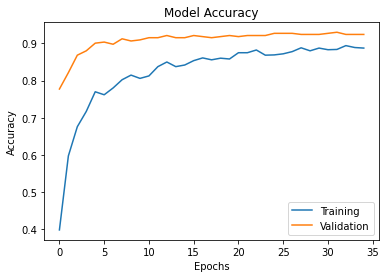

In [121]:
fig, ax = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
fig.savefig('Model Accuracy.png', format='png', dpi=300)

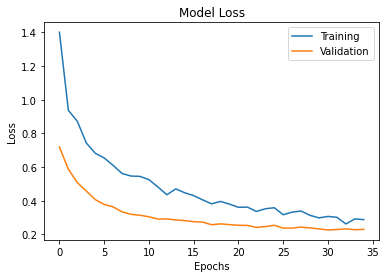

In [122]:
fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
fig.savefig('Model Loss.png', format='png', dpi=300)

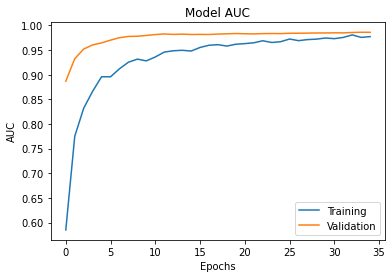

In [123]:
fig, ax = plt.subplots()
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
fig.savefig('Model AUC.png', format='png', dpi=300)

In [124]:
y_pred=model.predict(X_test)

In [125]:
y_pred_train=model.predict(X_train)

In [126]:
y_pred_val=model.predict(X_val)

In [128]:
y_new=model.predict(X_fin)

In [129]:
y_pred

array([[9.9025504e-04, 9.9384129e-01, 5.1684259e-03],
       [1.7635325e-04, 9.9691498e-01, 2.9086859e-03],
       [7.7972883e-01, 8.4500107e-07, 2.2027040e-01],
       ...,
       [1.6621915e-03, 9.7910208e-01, 1.9235700e-02],
       [6.5643018e-01, 3.1369033e-05, 3.4353840e-01],
       [6.1669719e-01, 2.9664694e-05, 3.8327312e-01]], dtype=float32)

In [130]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [131]:
y_test[1]

array([0, 1, 0], dtype=uint8)

In [132]:
y_pred[1]

array([1.7635325e-04, 9.9691498e-01, 2.9086859e-03], dtype=float32)

In [133]:
y_test1=np.argmax(y_test, axis=1)

In [134]:
y_test1

array([1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0,

In [135]:
y_pred1=np.argmax(y_pred,axis=1)

In [136]:
y_pred1

array([1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2,
       2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0,

In [137]:
y_test1[12]

0

In [138]:
y_pred1[12]

0

In [139]:
confusion_matrix(y_test1,y_pred1)

array([[137,   1,   5],
       [  0, 141,   7],
       [ 23,   3, 110]], dtype=int64)

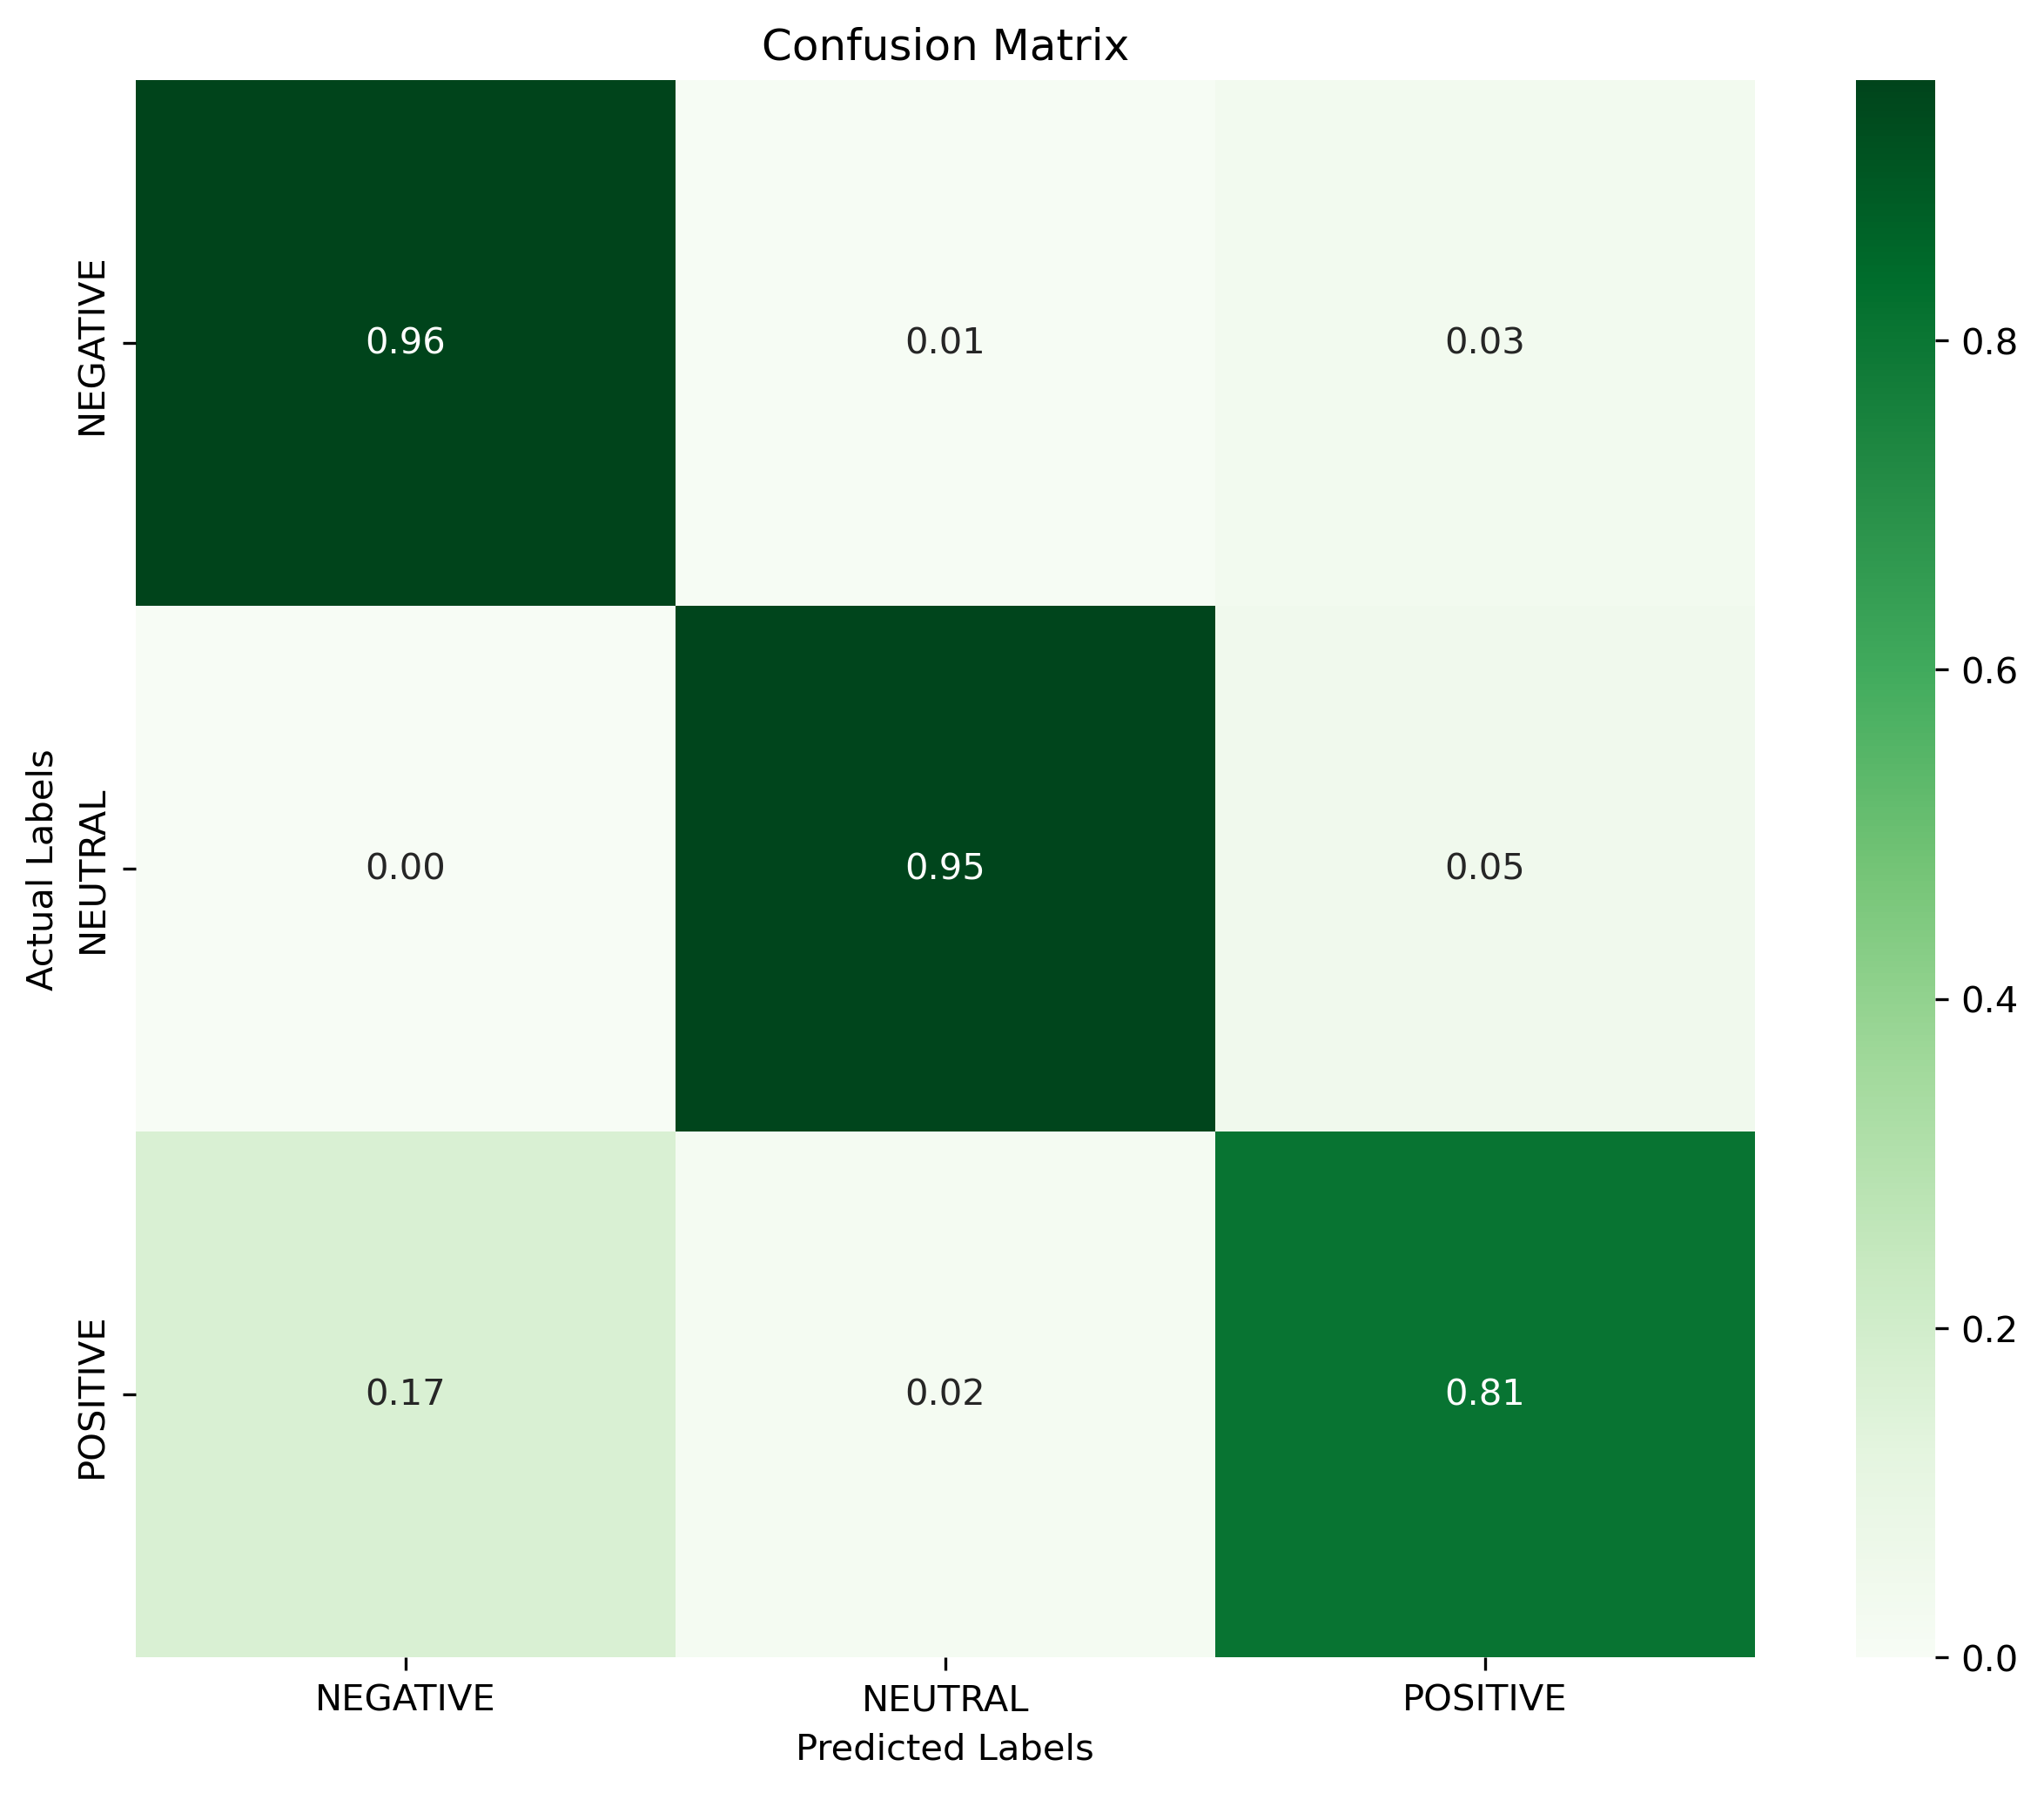

In [140]:
test= np.argmax(y_test, axis=1)
pred= np.argmax(y_pred, axis=1)
conf_matr = confusion_matrix(test, pred)

CLASSES=['NEGATIVE','NEUTRAL','POSITIVE']
cmn = conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8), dpi=300)

ax=sns.heatmap(cmn, annot=True,fmt=".2f", cmap='Greens',xticklabels= CLASSES,
                yticklabels=CLASSES)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix')
ax.figure.savefig('confmatrix.png',dpi=300,format='png')

In [141]:
print("classification_report\n",classification_report(y_test1,y_pred1))

classification_report
               precision    recall  f1-score   support

           0       0.86      0.96      0.90       143
           1       0.97      0.95      0.96       148
           2       0.90      0.81      0.85       136

    accuracy                           0.91       427
   macro avg       0.91      0.91      0.91       427
weighted avg       0.91      0.91      0.91       427



In [142]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,y_pred,multi_class='ovo')

In [143]:
auc

0.9774070926338462

In [144]:
new_pred=label_binarize(y_pred1,classes=np.unique(y_pred1))
classes=np.unique(y_pred1)

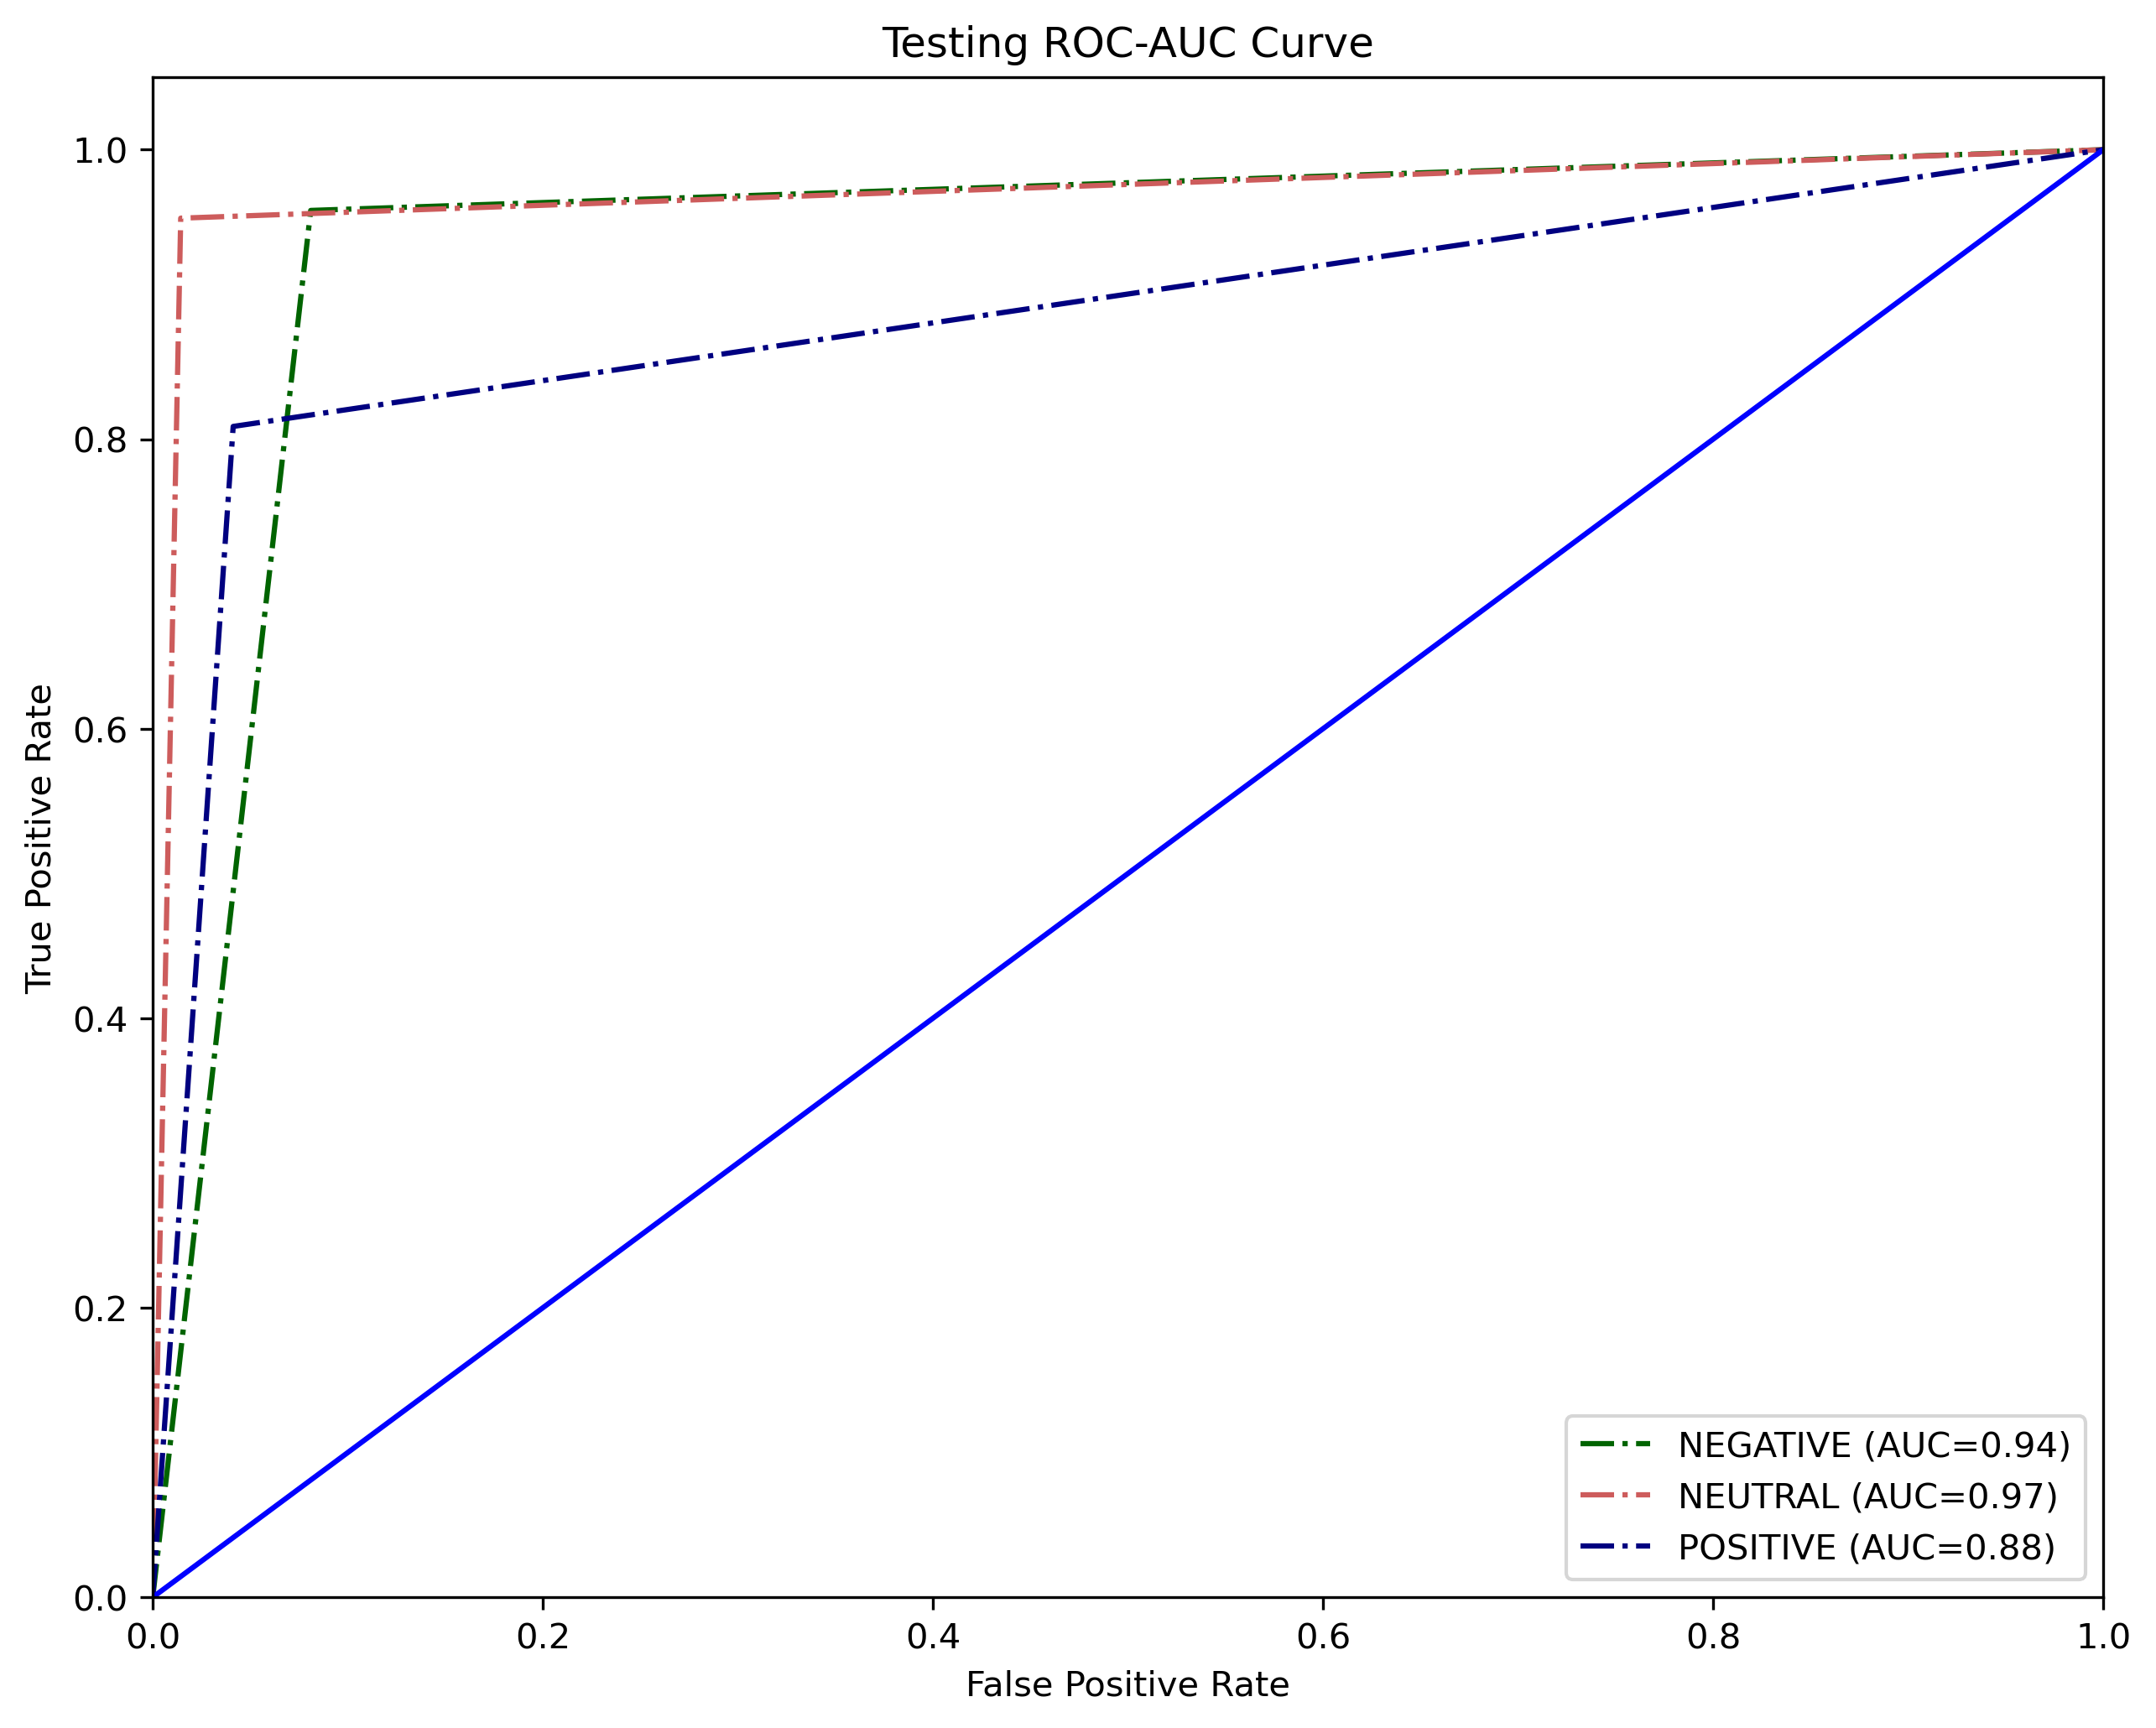

In [145]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10,8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_test[:,i],new_pred[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Testing ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Testing ROCAUC.png',dpi=300)

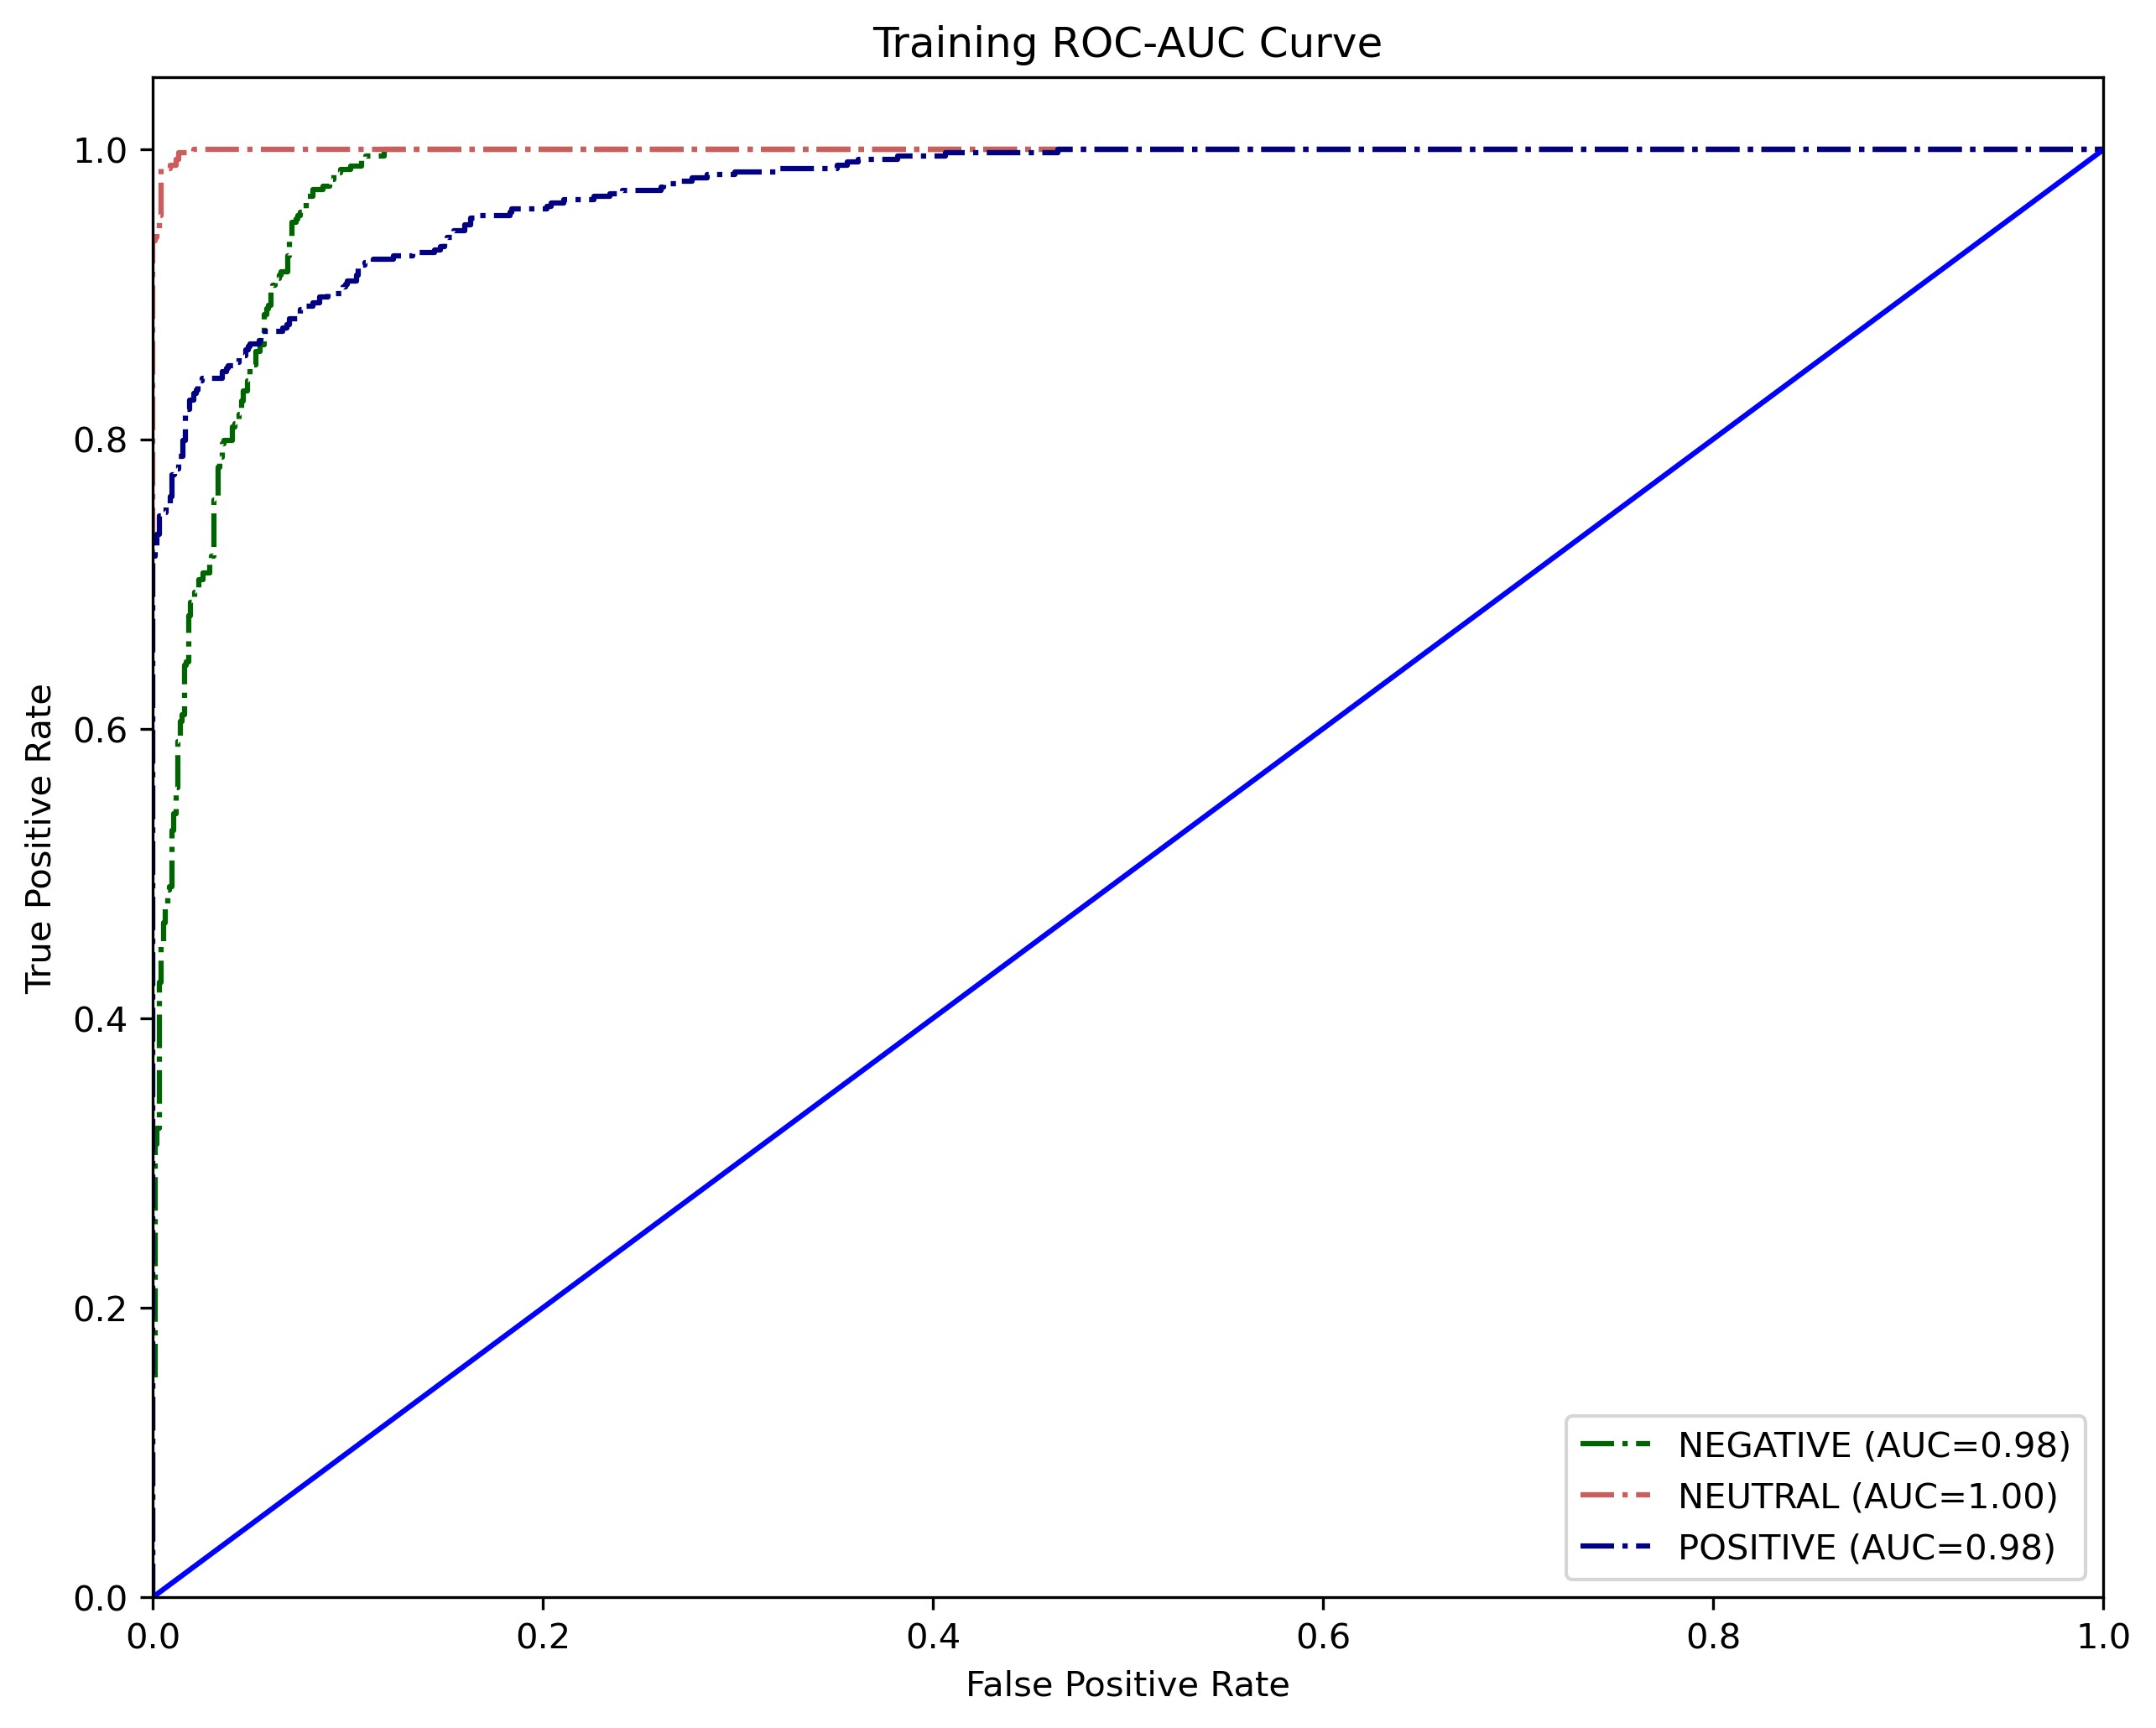

In [146]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_train[:,i],y_pred_train[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Training ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Training ROCAUC.png',dpi=300)

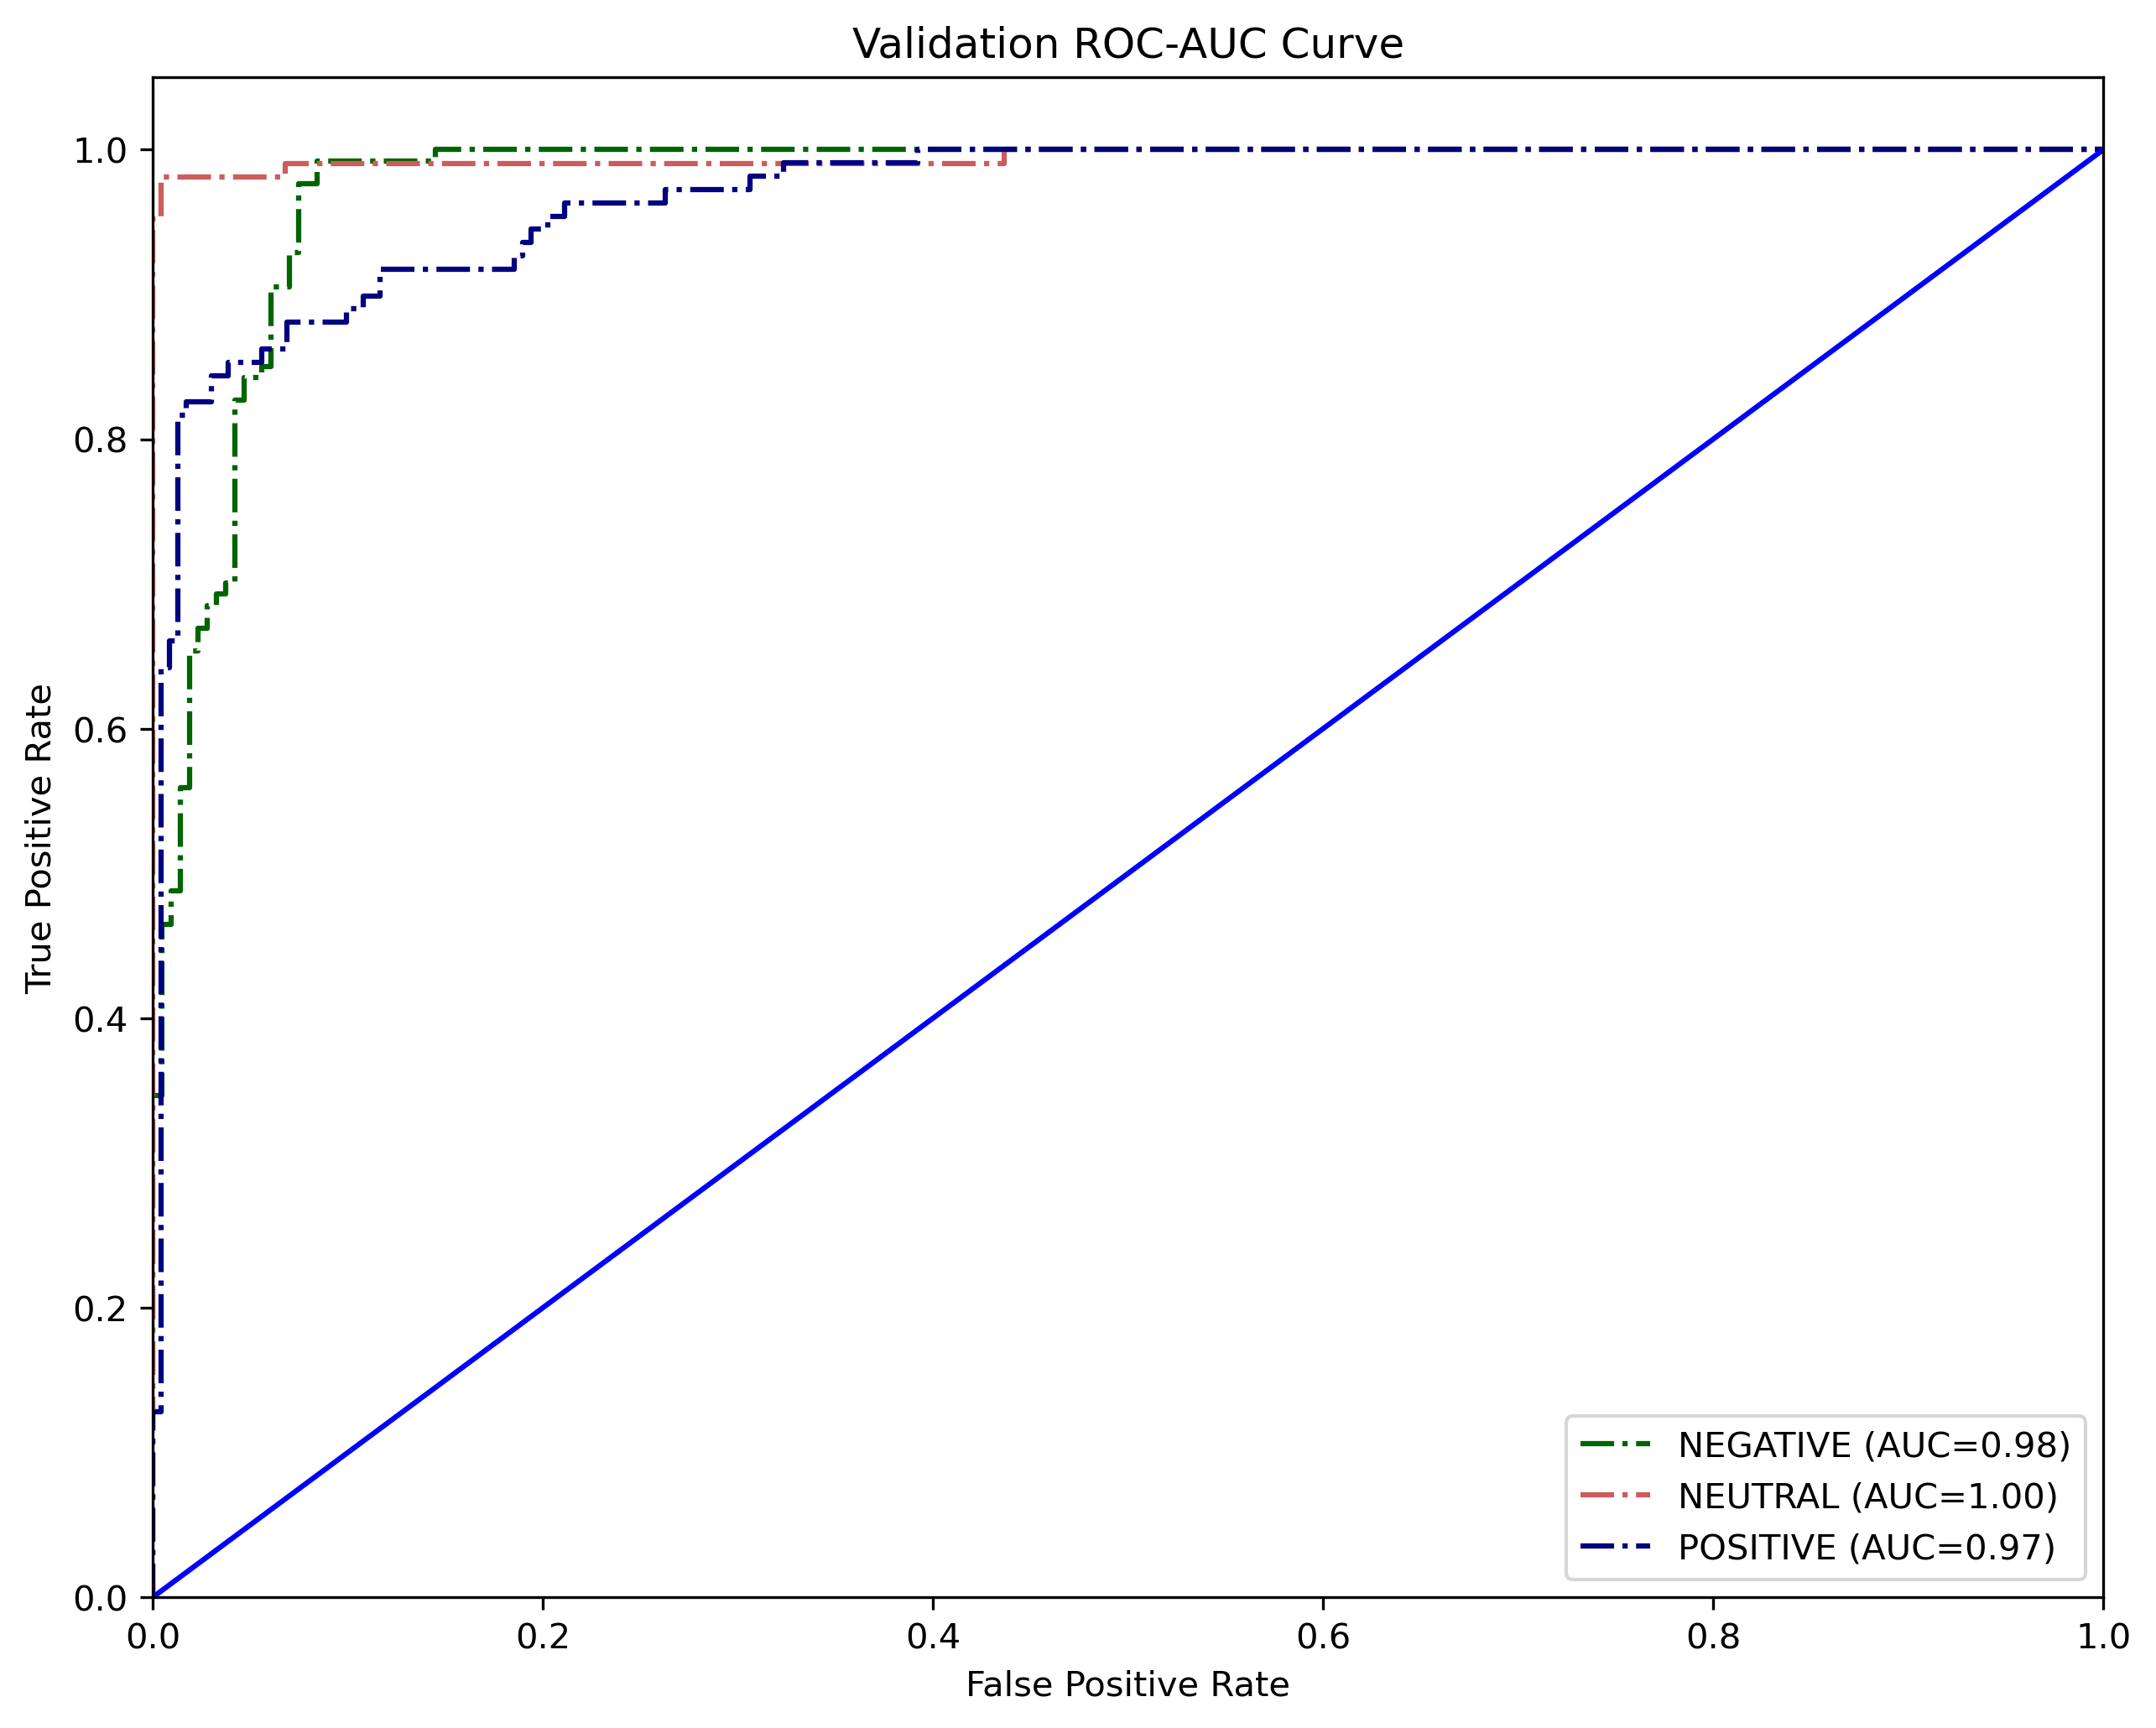

In [147]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_val[:,i],y_pred_val[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Validation ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Validation ROCAUC.png',dpi=300)

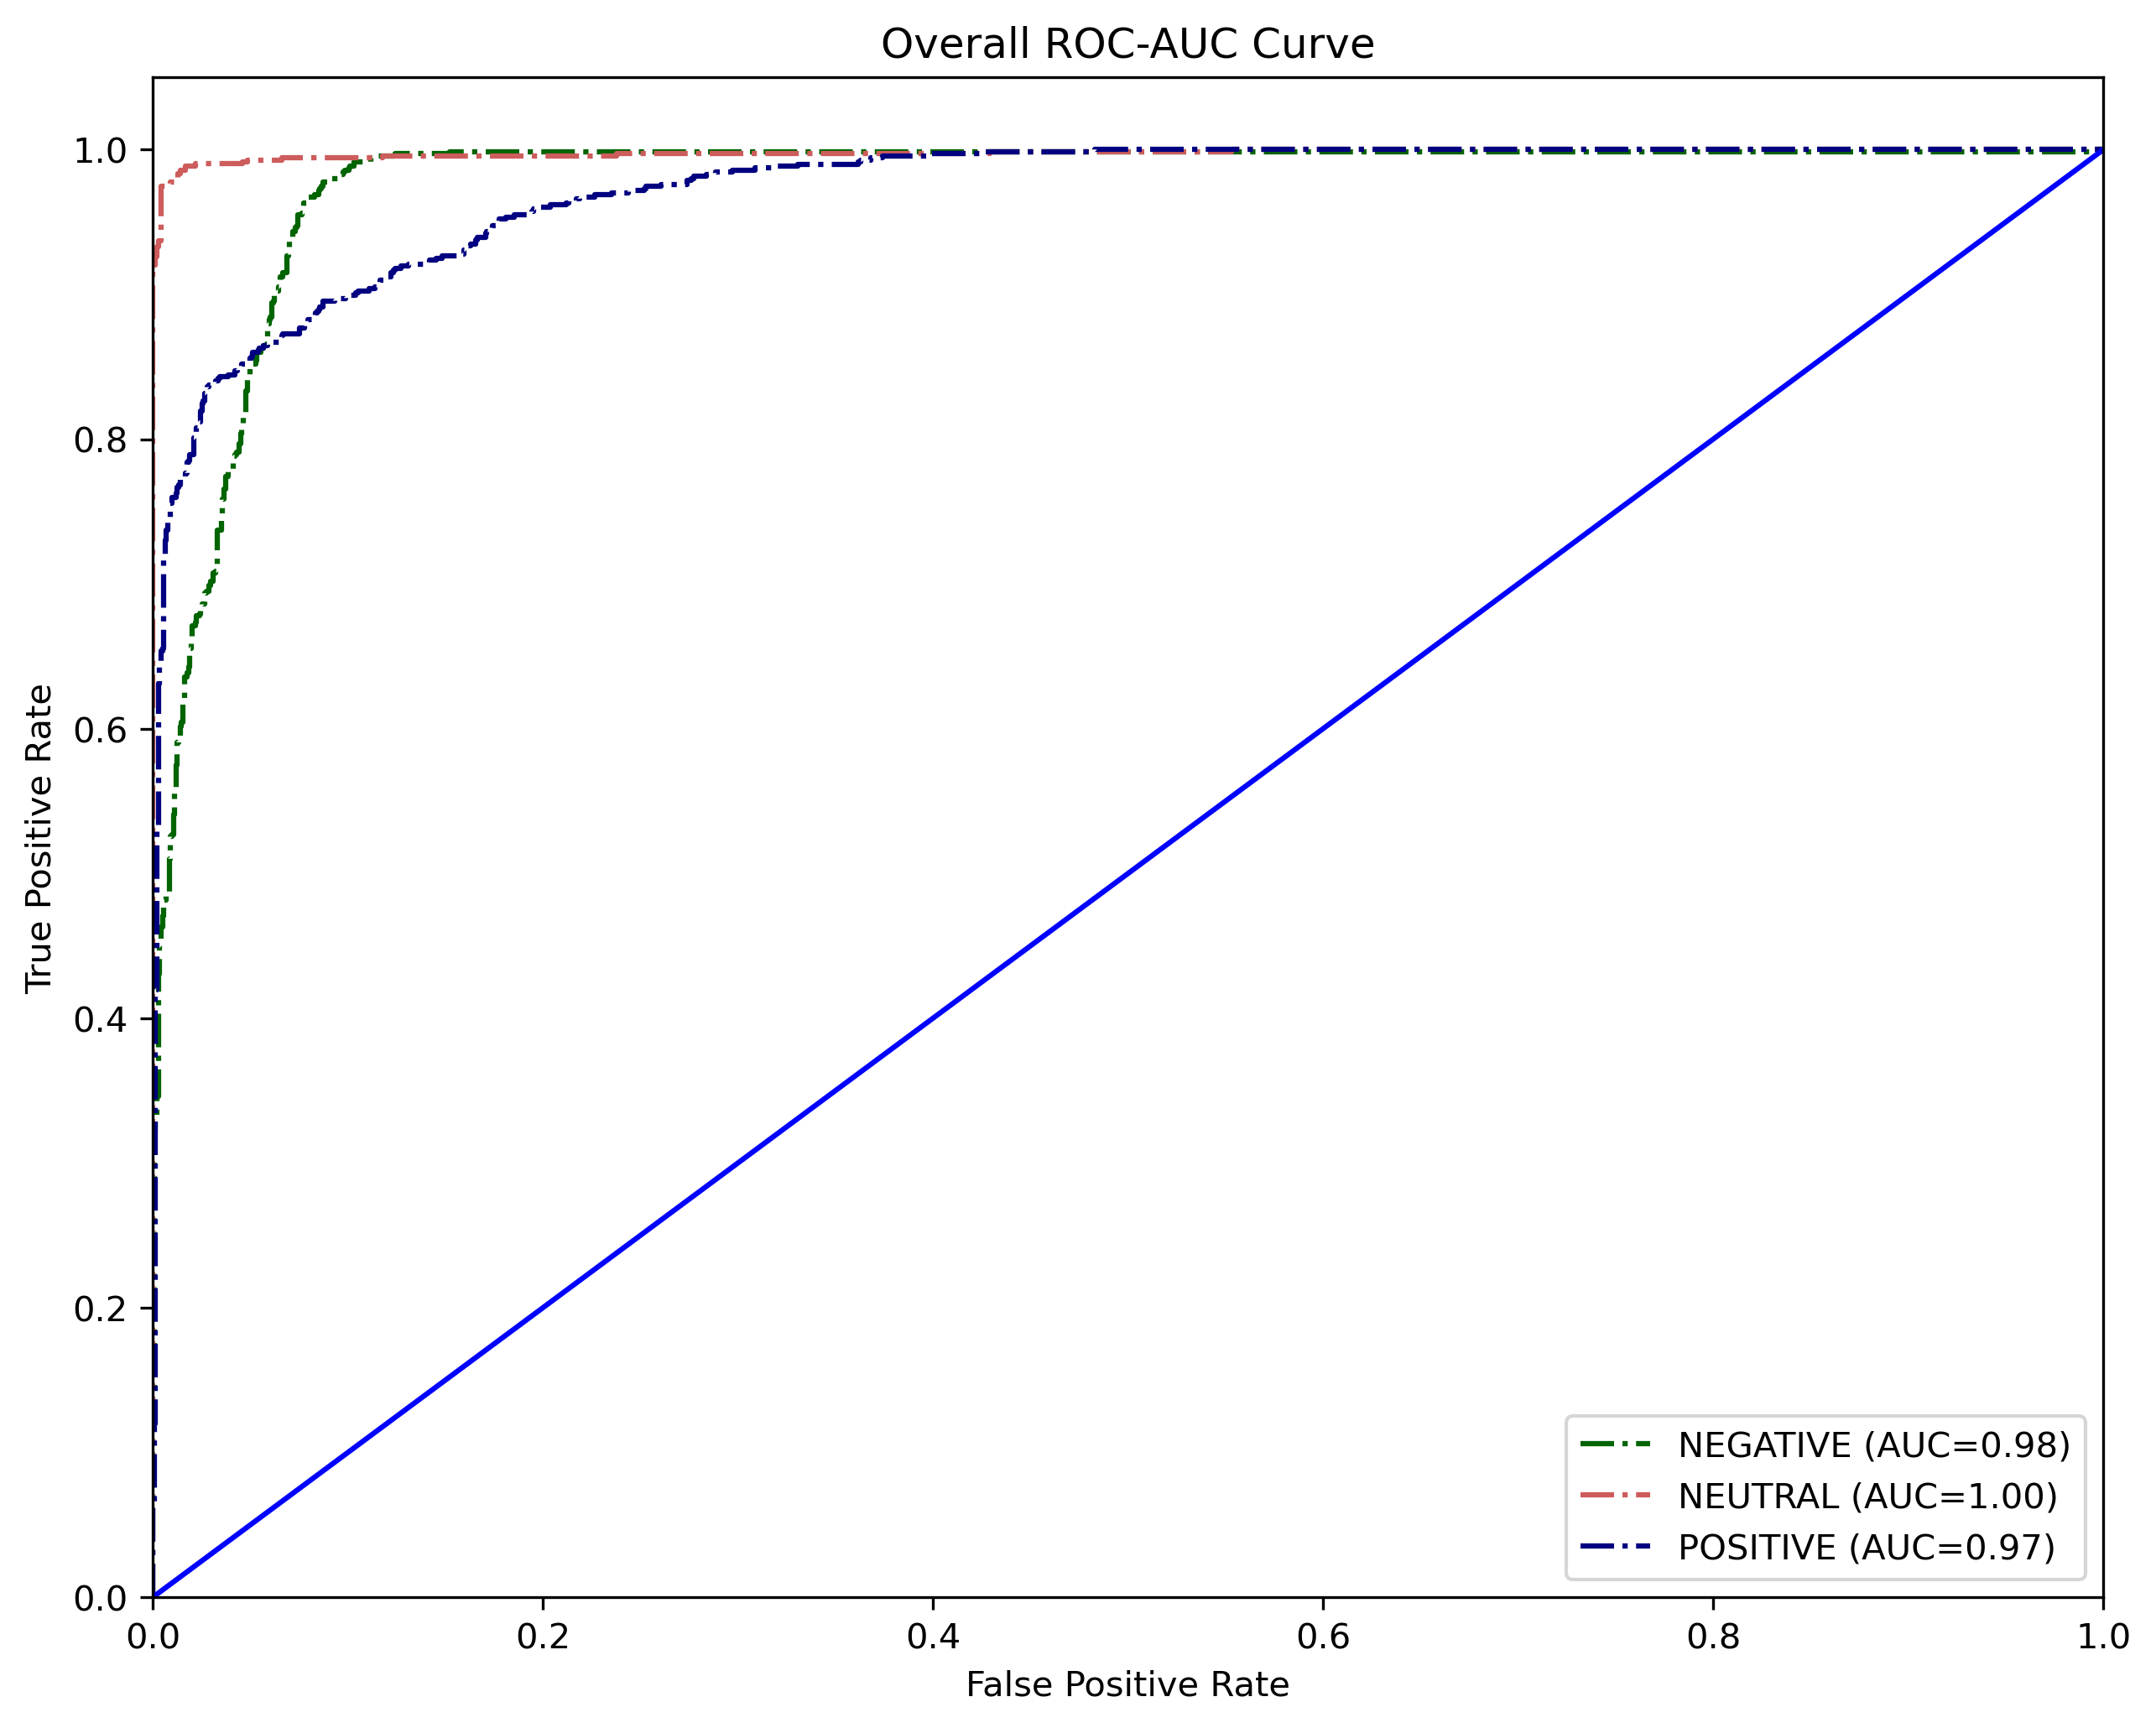

In [148]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y[:,i],y_new[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Overall ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Overall ROCAUC.png',dpi=300)